In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [2]:
income_dataset = pd.read_csv("census_income_dataset.csv", index_col=0)
income_dataset.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,SALARY
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
print(f'shape before cleaning{income_dataset.shape}')
# remove duplicates
income_dataset.dropna(inplace=True)
# remove duplicates
income_dataset.drop_duplicates(inplace=True)

print(f'shape after cleaning{income_dataset.shape}')


shape before cleaning(16281, 15)
shape after cleaning(16276, 15)


(16203, 15)

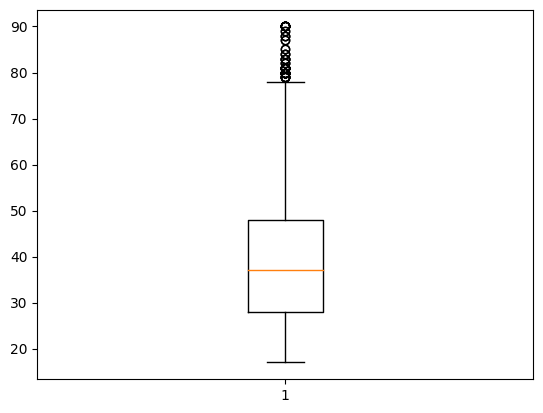

In [4]:
# Remove  AGE outliers
boxplot_plt = plt.boxplot(income_dataset["AGE"], showfliers=True)
whiskers_data = [item.get_ydata() for item in boxplot_plt['whiskers']]
lower_limit = whiskers_data[0][1]
upper_limit = whiskers_data[1][1]
income_dataset = income_dataset[(income_dataset.AGE >= lower_limit) & (income_dataset.AGE <= upper_limit)]
income_dataset.shape

## Age distribution of respondent

<AxesSubplot: ylabel='Frequency'>

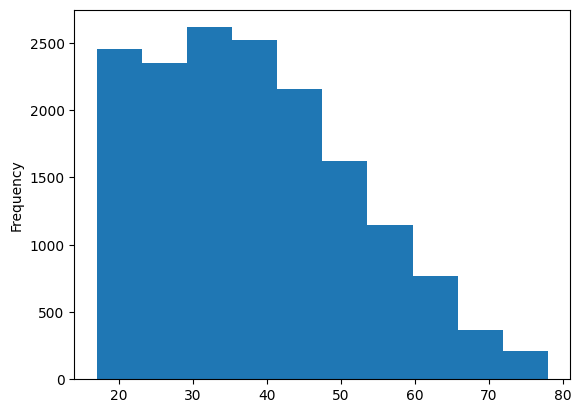

In [5]:
income_dataset.AGE.plot.hist(bins=10)

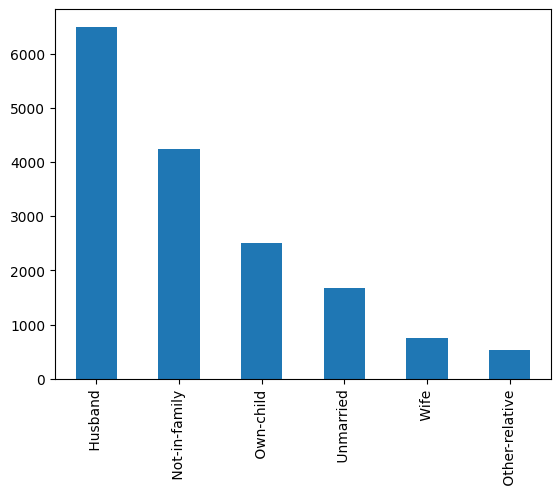

In [6]:
income_dataset.RELATIONSHIP.value_counts(dropna=False).plot.bar()
plt.title("")
plt.ylabel("")
plt.show()

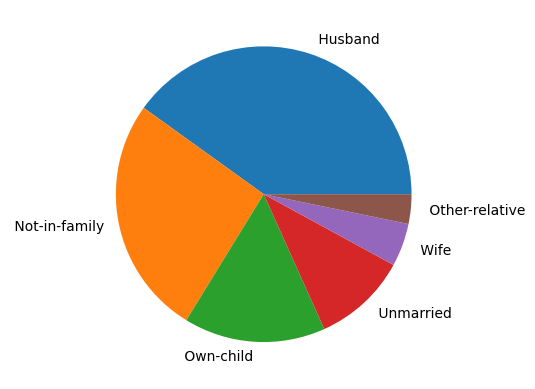

In [7]:
income_dataset.RELATIONSHIP.value_counts(dropna=False).plot.pie()
plt.title("")
plt.ylabel("")
plt.show()

## Correlation between salary and education

In [9]:
income_dataset['SALARY'].replace({' <=50K': 0, ' >50K': 1}, inplace=True)

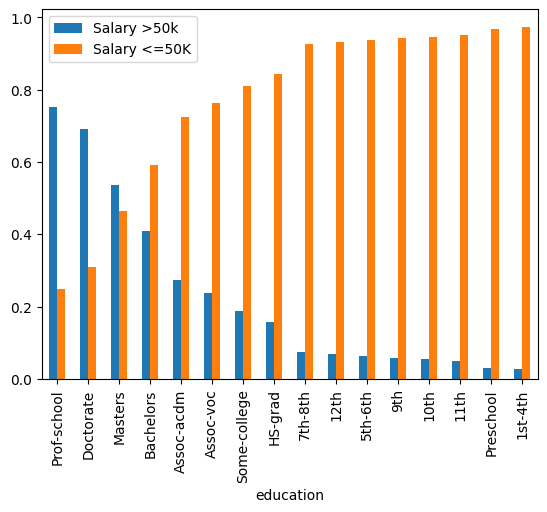

In [31]:
ratios_more_50k, ratios_less_50k = {}, {}
for group in income_dataset.groupby('EDUCATION').groups.keys():
    group_df = income_dataset.groupby('EDUCATION').get_group(group)
    ratios_more_50k[group.strip()] = group_df.SALARY.value_counts()[1] / group_df.shape[0]
    ratios_less_50k[group.strip()] = group_df.SALARY.value_counts()[0] / group_df.shape[0]
ratios_df = pd.DataFrame()
ratios_df['ratios_more_50k'] = pd.Series(ratios_more_50k).sort_values(ascending=False)
ratios_df['ratios_less_50k'] = pd.Series(ratios_less_50k).sort_values(ascending=False)
ratios_df.reset_index(inplace=True)
ratios_df.columns = ['education', 'ratios_more_50k', 'ratios_less_50k']
ratios_df.plot.bar(x='education', rot=90)
plt.legend(['Salary >50k', 'Salary <=50K'])


In [34]:
ratios_more_50k, ratios_less_50k = {}, {}
for group in income_dataset.groupby('SEX').groups.keys():
    group_df = income_dataset.groupby('SEX').get_group(group)
    ratios_more_50k[group.strip()] = group_df.SALARY.value_counts()[1] / group_df.shape[0]
    ratios_less_50k[group.strip()] = group_df.SALARY.value_counts()[0] / group_df.shape[0]
ratios_df = pd.DataFrame()
ratios_df['ratios_more_50k'] = pd.Series(ratios_more_50k).sort_values(ascending=False)
ratios_df['ratios_less_50k'] = pd.Series(ratios_less_50k).sort_values(ascending=False)
ratios_df.reset_index(inplace=True)
ratios_df.columns = ['SEX', 'ratios_more_50k', 'ratios_less_50k']

,SEX,ratios_more_50k,ratios_less_50k
0,Male,0.300259,0.699741
1,Female,0.109094,0.890906


In [25]:
income_dataset.columns

Index(['AGE', 'WORKCLASS', 'FNLWGT', 'EDUCATION', 'EDUCATION-NUM',
       'MARITAL STATUS', 'OCCUPATION', 'RELATIONSHIP', 'RACE', 'SEX',
       'CAPITAL-GAIN', 'CAPITAL-LOSS', 'HOURS-PER-WEEK', 'NATIVE-COUNTRY',
       'SALARY'],
      dtype='object')

In [44]:
income_dataset.groupby('SEX').get_group(' Female')['SALARY'].value_counts(normalize=True)

0    0.890906
1    0.109094
Name: SALARY, dtype: float64

In [45]:
income_dataset.groupby('SEX').get_group(' Male')['SALARY'].value_counts(normalize=True)


0    0.699741
1    0.300259
Name: SALARY, dtype: float64

In [27]:
income_dataset.RACE

0                      Black
1                      White
2                      White
3                      Black
4                      White
                ...         
16276                  White
16277                  Black
16278                  White
16279     Asian-Pac-Islander
16280                  White
Name: RACE, Length: 16203, dtype: object